In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


# 引入套件

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact,IntSlider
#- - - - - - - - - - - - - - - - - - - - - - -

from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD,Adam

from keras.datasets import mnist
from keras.utils import np_utils
from keras.utils import to_categorical

from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate ,add

# 輸入手寫辨識資料集

In [3]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [4]:
print("There are %d training data with size %d x %d" %x_train0.shape)
print("There are %d testing  data with size %d x %d" %x_test0.shape)

There are 60000 training data with size 28 x 28
There are 10000 testing  data with size 28 x 28


Reshape 資料大小

In [5]:
x_train = x_train0.reshape((60000,28*28))
x_test = x_test0.reshape((10000,28*28))

對　 ｘ　做　Ｎｏｒｍａｌｉｚｅ

In [12]:
x_train -= x_train.min()
x_train = x_train/x_train.max()
#- - - - - - - - - - - - - - - - - - - - 
x_test -= x_test.min()
x_test = x_test/x_test.max()

In [10]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [13]:
x_test.min(), x_test.max()

(0.0, 1.0)

對　ｙ　做　ｏｎｅ　ｈｏｔ　ｅｎｃｏｄｉｎｇ

In [9]:
y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

# 使用 Function API製作模型

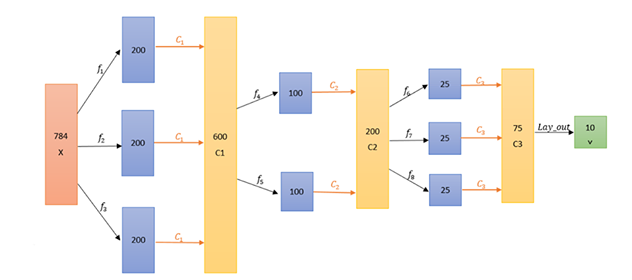

In [15]:
x = Input(shape=(784,))

In [16]:
#定義function
f_1 = Dense(200, activation='sigmoid')
f_2 = Dense(200, activation='sigmoid')
f_3 = Dense(200, activation='sigmoid')

f_4 = Dense(100, activation='relu')
f_5 = Dense(100, activation='relu')

f_6 = Dense(25, activation='relu')
f_7 = Dense(25, activation='relu')
f_8 = Dense(25, activation='relu')

lay_out= Dense(10, activation='softmax')

In [18]:
#統整 function
h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(x)

C_1 = concatenate([h_1,h_2,h_3])

h_4 = f_4(C_1)
h_5 = f_5(C_1)

C_2 = concatenate([h_4,h_5]) 

h_6 = f_6(C_2)
h_7 = f_7(C_2)
h_8 = f_8(C_2)

C_3 = concatenate([h_6,h_7,h_8])

y = lay_out(C_3)

In [19]:
model = Model(x,y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
concatenat

# 訓練模型

In [20]:
model.compile(loss = 'mse',optimizer=Adam(lr=0.001),metrics = ["accuracy"])
model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0417 - acc: 0.7136 - val_loss: 0.0157 - val_acc: 0.9011
Epoch 2/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0144 - acc: 0.9077 - val_loss: 0.0124 - val_acc: 0.9184
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0120 - acc: 0.9226 - val_loss: 0.0110 - val_acc: 0.9294
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0108 - acc: 0.9300 - val_loss: 0.0101 - val_acc: 0.9324
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0098 - acc: 0.9380 - val_loss: 0.0093 - val_acc: 0.9394
Epoch 6/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0088 - acc: 0.9442 - val_loss: 0.0086 - val_acc: 0.9451
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0

In [21]:
score = model.evaluate(x_test, y_test)
print('model:')
print('loss:', score[0])
print('正確率:', score[1])

10000/10000 [==============================] - 0s 46us/step
model:
loss: 0.0048750227503136555
正確率: 0.968
